In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("not_final3.csv")
df = df.rename(columns={'Sport_-1': 'Sport'})

# List of sports to exclude
excluded_sports = ['climbing', 'Fitness', 'Headis']

# Filter out excluded sports
df = df[~df['Sport'].isin(excluded_sports)]

# Define parameters including 'label'
parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV', 'label']

# Initialize a dictionary to store processed data for each sport
sport_data_dict = {}

for sport_name in df['Sport'].unique():
    sport_dict = {'Year': []}
    
    # Initialize a DataFrame for Year
    all_years = pd.Series(dtype=int)
    
    for parameter in parameters:
        param_columns = [col for col in df.columns if col.startswith(f"{parameter}_")]
        
        if not param_columns:
            continue
        
        # Melt the data for this parameter
        melted_data = df[df['Sport'] == sport_name][['Sport'] + param_columns].melt(
            id_vars='Sport', var_name='Year', value_name=f'{parameter}_Value'
        )
        melted_data['Year'] = melted_data['Year'].str.extract(r'(\d+)').astype(int)  # Extract year as int
        melted_data = melted_data.sort_values('Year')

        if all_years.empty:
            all_years = melted_data['Year']
        else:
            all_years = pd.concat([all_years, melted_data['Year']]).drop_duplicates().sort_values()
        
        # Align parameter data with all years
        melted_data = melted_data.set_index('Year').reindex(all_years).reset_index()
        
        # Handle missing data based on parameter type
        if parameter == 'drug':
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value'].fillna(0)  # For drug, fill missing with 0
        elif parameter in ['popularity', 'CV']:
            # For popularity and CV, treat 0 as missing and replace with NaN
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value'].replace(0, np.nan)
        else:
            # Preserve NaN for other parameters
            melted_data[f'{parameter}_Value'] = melted_data[f'{parameter}_Value']
        
        # Store parameter values aligned by Year
        sport_dict[parameter] = melted_data[f'{parameter}_Value'].values

    # Ensure that Year is included
    sport_dict['Year'] = all_years.values
    
    # Convert the dictionary to a DataFrame
    sport_data_dict[sport_name] = pd.DataFrame(sport_dict)

# Example usage: print data for a specific sport
for sport, data in sport_data_dict.items():
    data.set_index('Year', inplace=True)  # Ensure Year is the index
    

    print(f"\nData for {sport}:")
    print(data.head())



Data for Alpine Skiing:
      drug  equity  popularity  normalizedcountry  CV  label
Year                                                        
1896   0.0     NaN         NaN                NaN NaN      0
1900   0.0     NaN         NaN                NaN NaN      0
1904   0.0     NaN         NaN                NaN NaN      0
1906   0.0     NaN         NaN                NaN NaN      0
1908   0.0     NaN         NaN                NaN NaN      0

Data for Alpinism:
      drug  equity  popularity  normalizedcountry  CV  label
Year                                                        
1896   0.0     NaN         NaN                NaN NaN      0
1900   0.0     NaN         NaN                NaN NaN      0
1904   0.0     NaN         NaN                NaN NaN      0
1906   0.0     NaN         NaN                NaN NaN      0
1908   0.0     NaN         NaN                NaN NaN      0

Data for Archery:
      drug    equity  popularity  normalizedcountry        CV  label
Year         

In [2]:
import pandas as pd

# Initialize an empty list to store each sport's data
all_sports_data = []

# Iterate over the sport_data_dict to process each sport's DataFrame
for sport, df in sport_data_dict.items():
    df = df.reset_index()  # Ensure 'Year' is a column, not an index
    df['Sport'] = sport  # Add a new column to indicate the sport name
    all_sports_data.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
combined_sport_data = pd.concat(all_sports_data, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_sport_data


,Year,drug,equity,popularity,normalizedcountry,CV,label,Sport
0,1896,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
1,1900,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
2,1904,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
3,1906,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
4,1908,0.0,NaN,NaN,NaN,NaN,0,Alpine Skiing
...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295,0.722179,1,Wrestling
2011,2012,4.0,0.224189,0.026238,0.350,0.767672,1,Wrestling
2012,2016,1.0,0.323699,0.025278,0.330,0.709537,1,Wrestling
2013,2020,0.0,0.333333,0.027252,NaN,NaN,1,Wrestling


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('not_final3.csv')

# Select specific columns by their names
selected_columns = df[['Sport_-1', 'estimate per event_2024']]
selected_columns = selected_columns.drop([65, 66, 67])
selected_columns = selected_columns.rename(columns={'estimate per event_2024': 'sustain', 'Sport_-1': 'Sport'})

# Apply log scale normalization to the sustain column
selected_columns['sustain'] = np.log1p(selected_columns['sustain'])

# Apply Min-Max normalization
scaler = MinMaxScaler()
selected_columns['sustain'] = scaler.fit_transform(selected_columns[['sustain']])

# Display the normalized data
print(selected_columns)


               Sport   sustain
0      Alpine Skiing  0.567916
1           Alpinism  0.464455
2            Archery  0.344805
3   Art Competitions  0.000000
4          Athletics  0.666640
..               ...       ...
60        Tug-Of-War  0.323558
61        Volleyball  0.484022
62        Water Polo  0.526599
63     Weightlifting  0.426390
64         Wrestling  0.437871

[65 rows x 2 columns]


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fill_drug_column(df):
    df['drug'] = df['drug'].ffill().bfill()  # Forward fill, then backward fill
    return df

def regression_imputation(df, column, degree=2, min_val=None, max_val=None):
    # Extract available data
    available_data = df[df[column].notna()]
    missing_data = df[df[column].isna()]

    if len(available_data) < 2:
        print(f"Skipping regression for {column}: Not enough data.")
        return df[column]

    # If there's no missing data, return the column as is
    if missing_data.empty:
        return df[column]
    
    # Prepare features (Year as X) and target (column as y)
    X_train = available_data.index.values.reshape(-1, 1)  # Year as feature
    y_train = available_data[column].values

    # Use polynomial regression
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict missing values
    X_missing = missing_data.index.values.reshape(-1, 1)
    X_missing_poly = poly.transform(X_missing)
    predictions = model.predict(X_missing_poly)

    # Clamp predictions within the specified range
    if min_val is not None:
        predictions = np.maximum(predictions, min_val)
    if max_val is not None:
        predictions = np.minimum(predictions, max_val)
    
    df.loc[missing_data.index, column] = predictions
    
    return df[column]

def fill_continuous_columns_with_regression(df, degree=1):
    for col in ['equity', 'popularity', 'normalizedcountry', 'CV']:
        min_val, max_val = None, None
        if col == 'normalizedcountry':
            min_val, max_val = 0.0, 1.0
        elif col == 'equity':
            min_val, max_val = 0.0, 0.5
        elif col == 'popularity':
            min_val, max_val = 0.0, 0.4  # Cap popularity
        elif col == 'CV':
            min_val, max_val = 0.0, 1.5  # Cap CV

        if df[col].notna().sum() < 2:
            print(f"Skipping {col} due to insufficient data.")
            continue
        df[col] = regression_imputation(df, col, degree=degree, min_val=min_val, max_val=max_val)
    return df

# Example Usage for Filling Missing Data
for sport, data in sport_data_dict.items():
    data = fill_drug_column(data)  # Fill drug column as before
    sport_data_dict[sport] = fill_continuous_columns_with_regression(data)

# Display the filled DataFrame for Alpine Skiing as an example
print(sport_data_dict['Alpine Skiing'].head(30))


Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normalizedcountry due to insufficient data.
Skipping CV due to insufficient data.
Skipping equity due to insufficient data.
Skipping popularity due to insufficient data.
Skipping normaliz

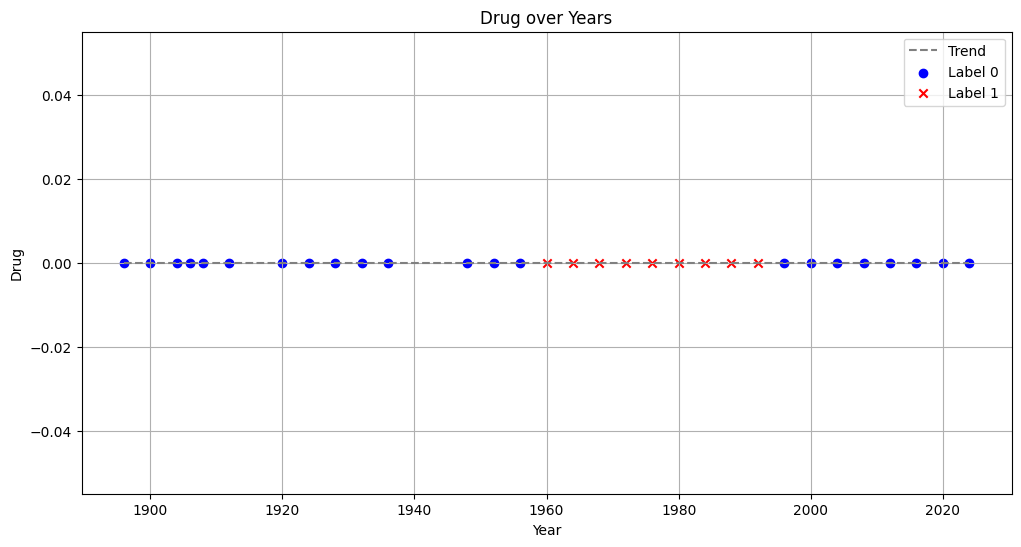

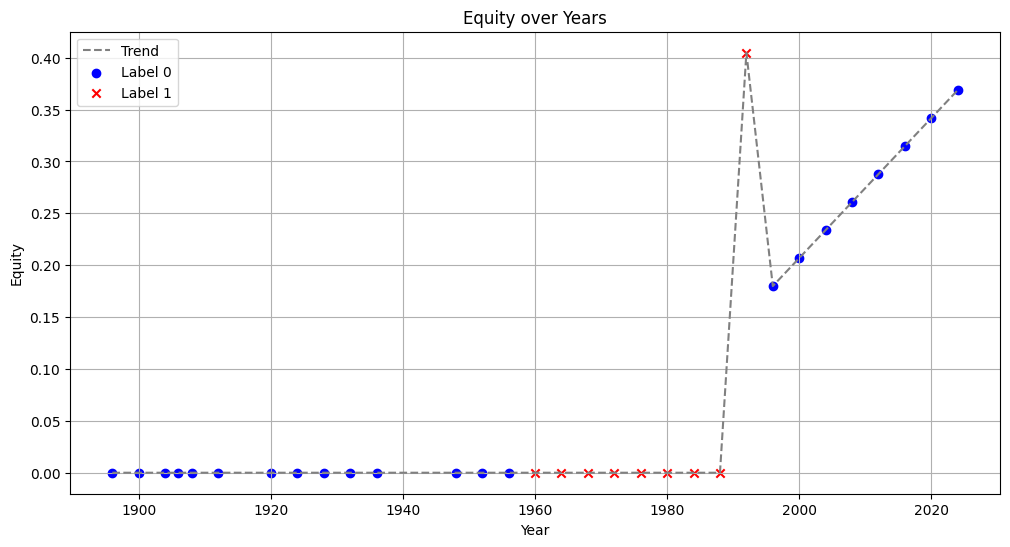

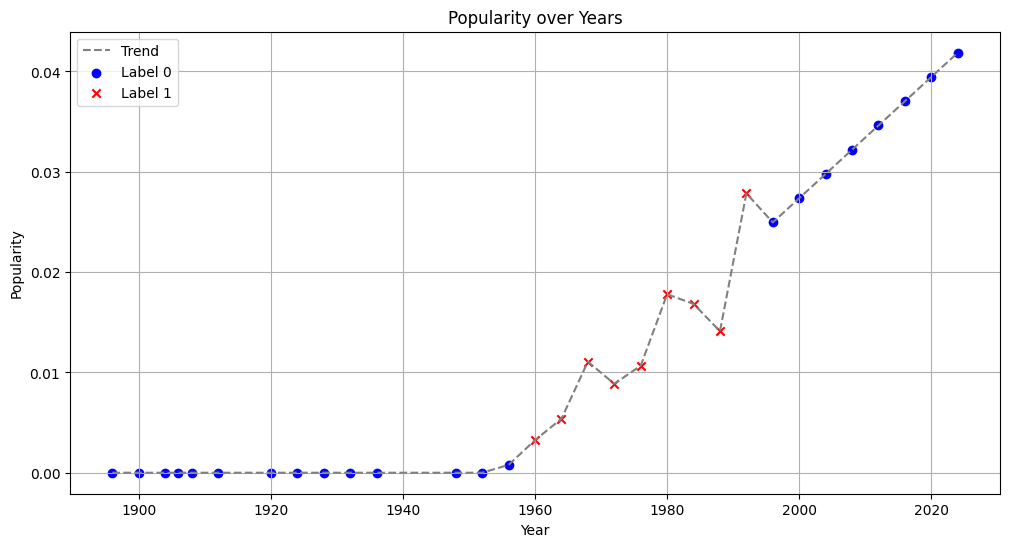

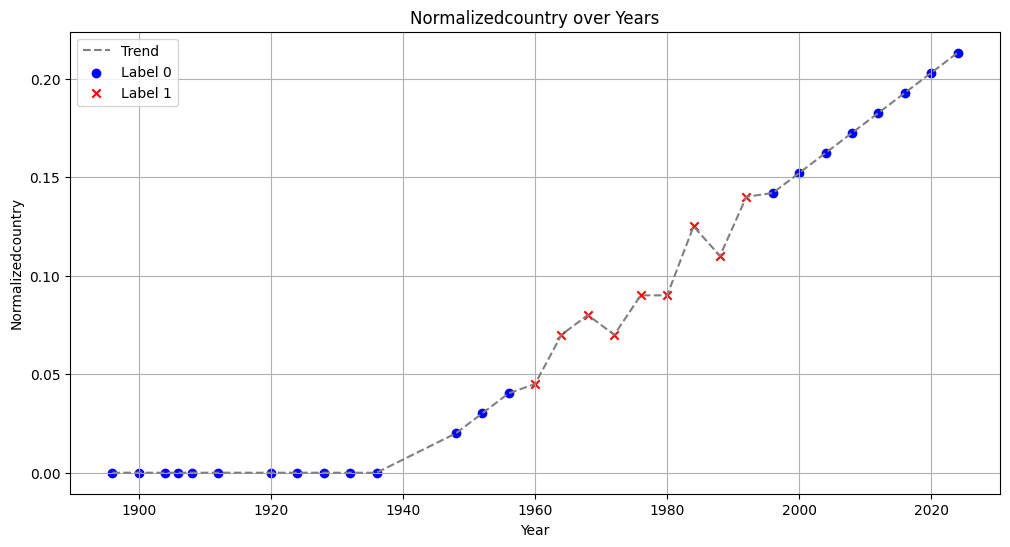

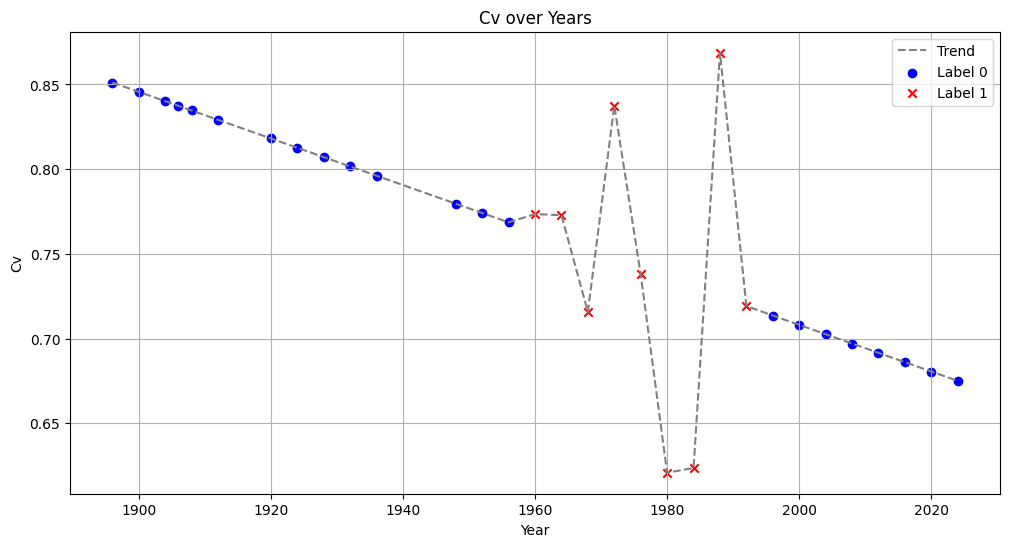

In [5]:
import matplotlib.pyplot as plt

def plot_data_with_labels(data):
    """
    Plot data with distinct colors for points where label is 1 or 0.

    Parameters:
    data (pd.DataFrame): DataFrame containing the columns: 'drug', 'equity', 'popularity', 
                         'normalizedcountry', 'CV', 'label' with 'Year' as the index.
    """
    # Filter data based on labels
    label_0 = data[data['label'] == 0]
    label_1 = data[data['label'] == 1]

    # Plot each parameter
    parameters = ['drug', 'equity', 'popularity', 'normalizedcountry', 'CV']
    for param in parameters:
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[param], color='gray', label='Trend', linestyle='--')
        
        # Scatter plot for label 0
        plt.scatter(label_0.index, label_0[param], color='blue', label='Label 0', marker='o')
        
        # Scatter plot for label 1
        plt.scatter(label_1.index, label_1[param], color='red', label='Label 1', marker='x')
        
        # Add labels and title
        plt.title(f"{param.capitalize()} over Years")
        plt.xlabel("Year")
        plt.ylabel(param.capitalize())
        plt.legend()
        plt.grid(True)
        
        # Save or show the plot
        plt.show()

# Assuming data is in a pandas DataFrame named df
# plot_data_with_labels(df)
plot_data_with_labels(sport_data_dict['Biathlon'])

In [6]:
import pandas as pd

# Initialize an empty list to store each sport's data
all_sports_data = []

# Iterate over the sport_data_dict to process each sport's DataFrame
for sport, df in sport_data_dict.items():
    df = df.reset_index()  # Ensure 'Year' is a column, not an index
    df['Sport'] = sport  # Add a new column to indicate the sport name
    all_sports_data.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
combined_sport_data = pd.concat(all_sports_data, ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_sport_data


,Year,drug,equity,popularity,normalizedcountry,CV,label,Sport
0,1896,0.0,0.316822,0.029387,0.023511,0.775016,0,Alpine Skiing
1,1900,0.0,0.318375,0.029939,0.031223,0.780618,0,Alpine Skiing
2,1904,0.0,0.319929,0.030490,0.038936,0.786221,0,Alpine Skiing
3,1906,0.0,0.320706,0.030766,0.042793,0.789022,0,Alpine Skiing
4,1908,0.0,0.321482,0.031042,0.046649,0.791823,0,Alpine Skiing
...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295000,0.722179,1,Wrestling
2011,2012,4.0,0.224189,0.026238,0.350000,0.767672,1,Wrestling
2012,2016,1.0,0.323699,0.025278,0.330000,0.709537,1,Wrestling
2013,2020,0.0,0.333333,0.027252,0.356916,0.663988,1,Wrestling


In [7]:
# Merge the DataFrames on the 'Sport' column
merged_df2 = combined_sport_data.merge(selected_columns, on='Sport', how='left').dropna()
merged_df = merged_df2
# Display the resulting DataFrame
merged_df2 = merged_df2.drop(columns=['Sport'])
merged_df

,Year,drug,equity,popularity,normalizedcountry,CV,label,Sport,sustain
0,1896,0.0,0.316822,0.029387,0.023511,0.775016,0,Alpine Skiing,0.567916
1,1900,0.0,0.318375,0.029939,0.031223,0.780618,0,Alpine Skiing,0.567916
2,1904,0.0,0.319929,0.030490,0.038936,0.786221,0,Alpine Skiing,0.567916
3,1906,0.0,0.320706,0.030766,0.042793,0.789022,0,Alpine Skiing,0.567916
4,1908,0.0,0.321482,0.031042,0.046649,0.791823,0,Alpine Skiing,0.567916
...,...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295000,0.722179,1,Wrestling,0.437871
2011,2012,4.0,0.224189,0.026238,0.350000,0.767672,1,Wrestling,0.437871
2012,2016,1.0,0.323699,0.025278,0.330000,0.709537,1,Wrestling,0.437871
2013,2020,0.0,0.333333,0.027252,0.356916,0.663988,1,Wrestling,0.437871


In [8]:
# Filter data for normal class
normal_class_data = merged_df[merged_df['label'] == 1].drop(columns=['label', 'Sport'])


In [9]:
merged_df = normal_class_data# Check basic information
print(merged_df.info())

# Display the first few rows
print(merged_df.head())

# Summary statistics
print(merged_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 10 to 2014
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               880 non-null    int64  
 1   drug               880 non-null    float64
 2   equity             880 non-null    float64
 3   popularity         880 non-null    float64
 4   normalizedcountry  880 non-null    float64
 5   CV                 880 non-null    float64
 6   sustain            880 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 55.0 KB
None
    Year  drug    equity  popularity  normalizedcountry        CV   sustain
10  1936   0.0  0.359223    0.013919              0.130  0.870456  0.567916
11  1948   0.0  0.258333    0.048128              0.125  0.898061  0.567916
12  1952   0.0  0.335979    0.040393              0.140  0.818058  0.567916
13  1956   0.0  0.357320    0.062636              0.145  0.953060  0.567916
14  1960   0.0  0.403125    0.0

In [10]:
merged_df = normal_class_data

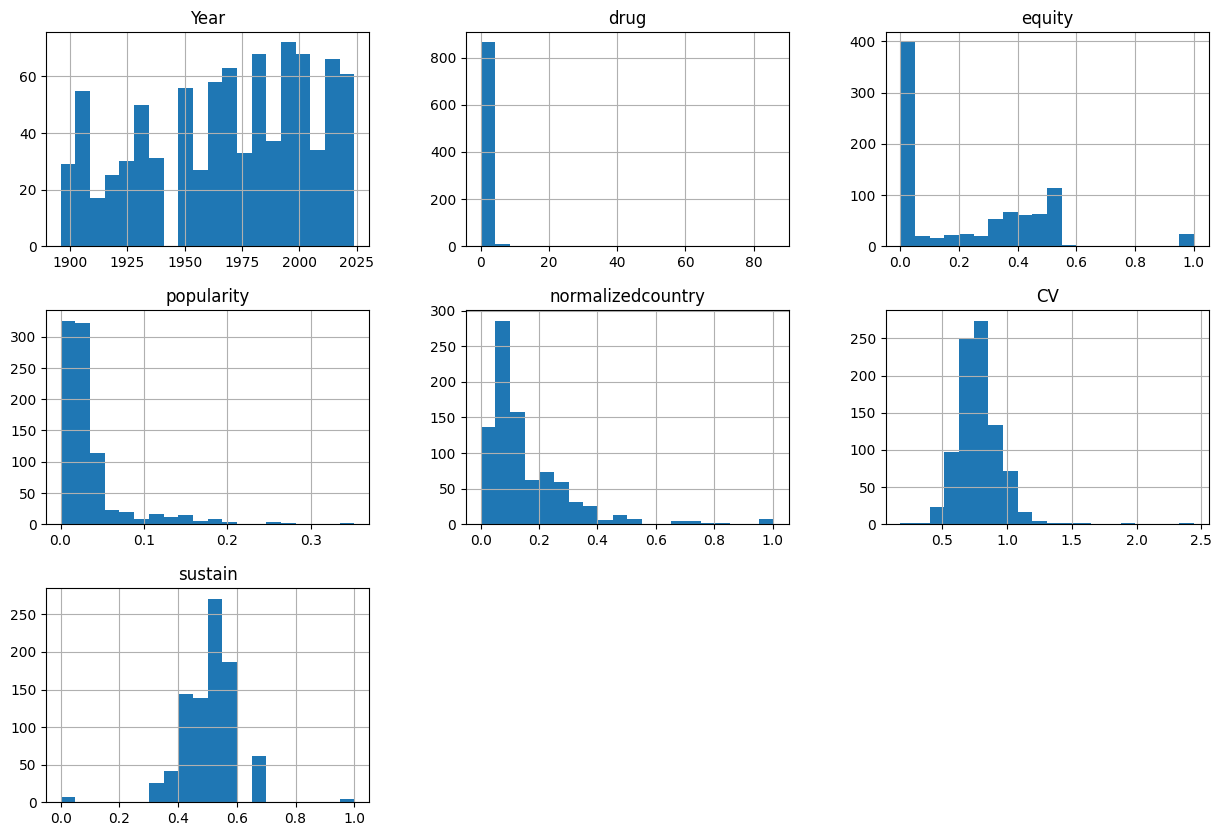

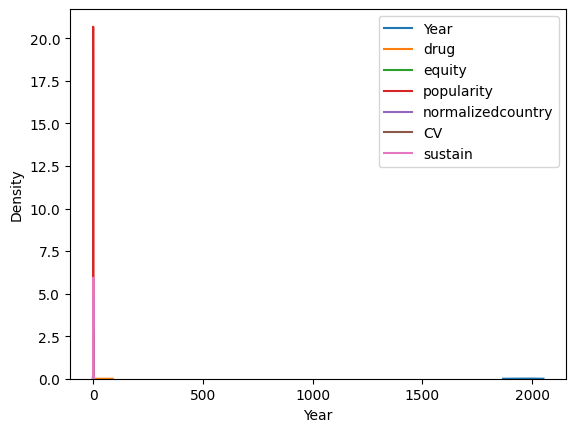

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
merged_df.hist(bins=20, figsize=(15, 10))
plt.show()

# KDE plots for each column
for column in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(merged_df[column], label=column)
plt.legend()
plt.show()


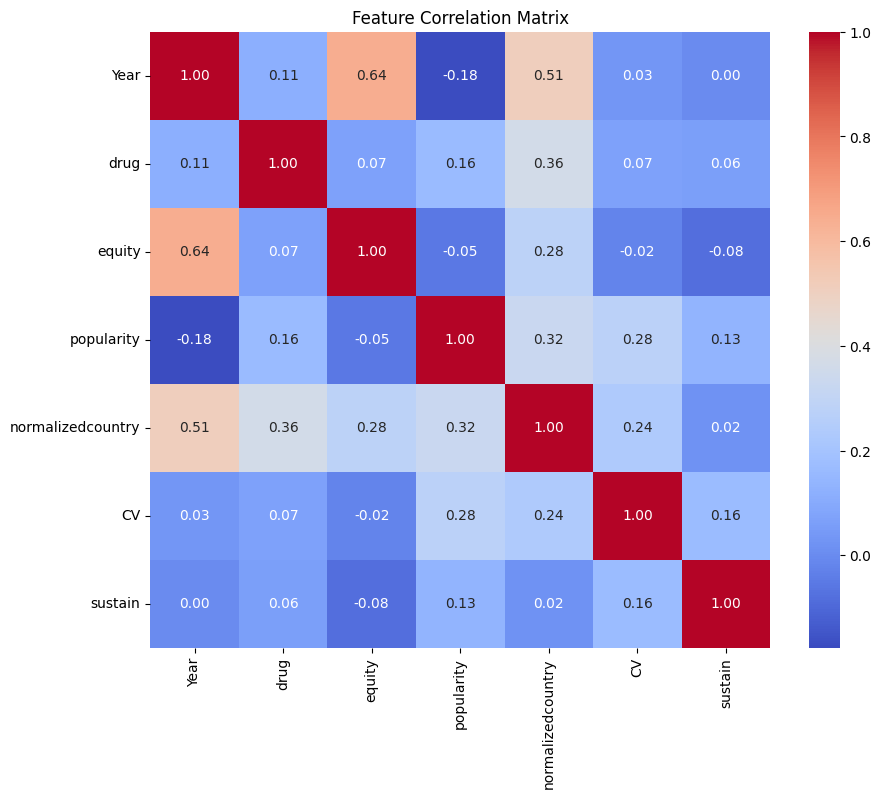

In [12]:
# Correlation matrix
corr_matrix = merged_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


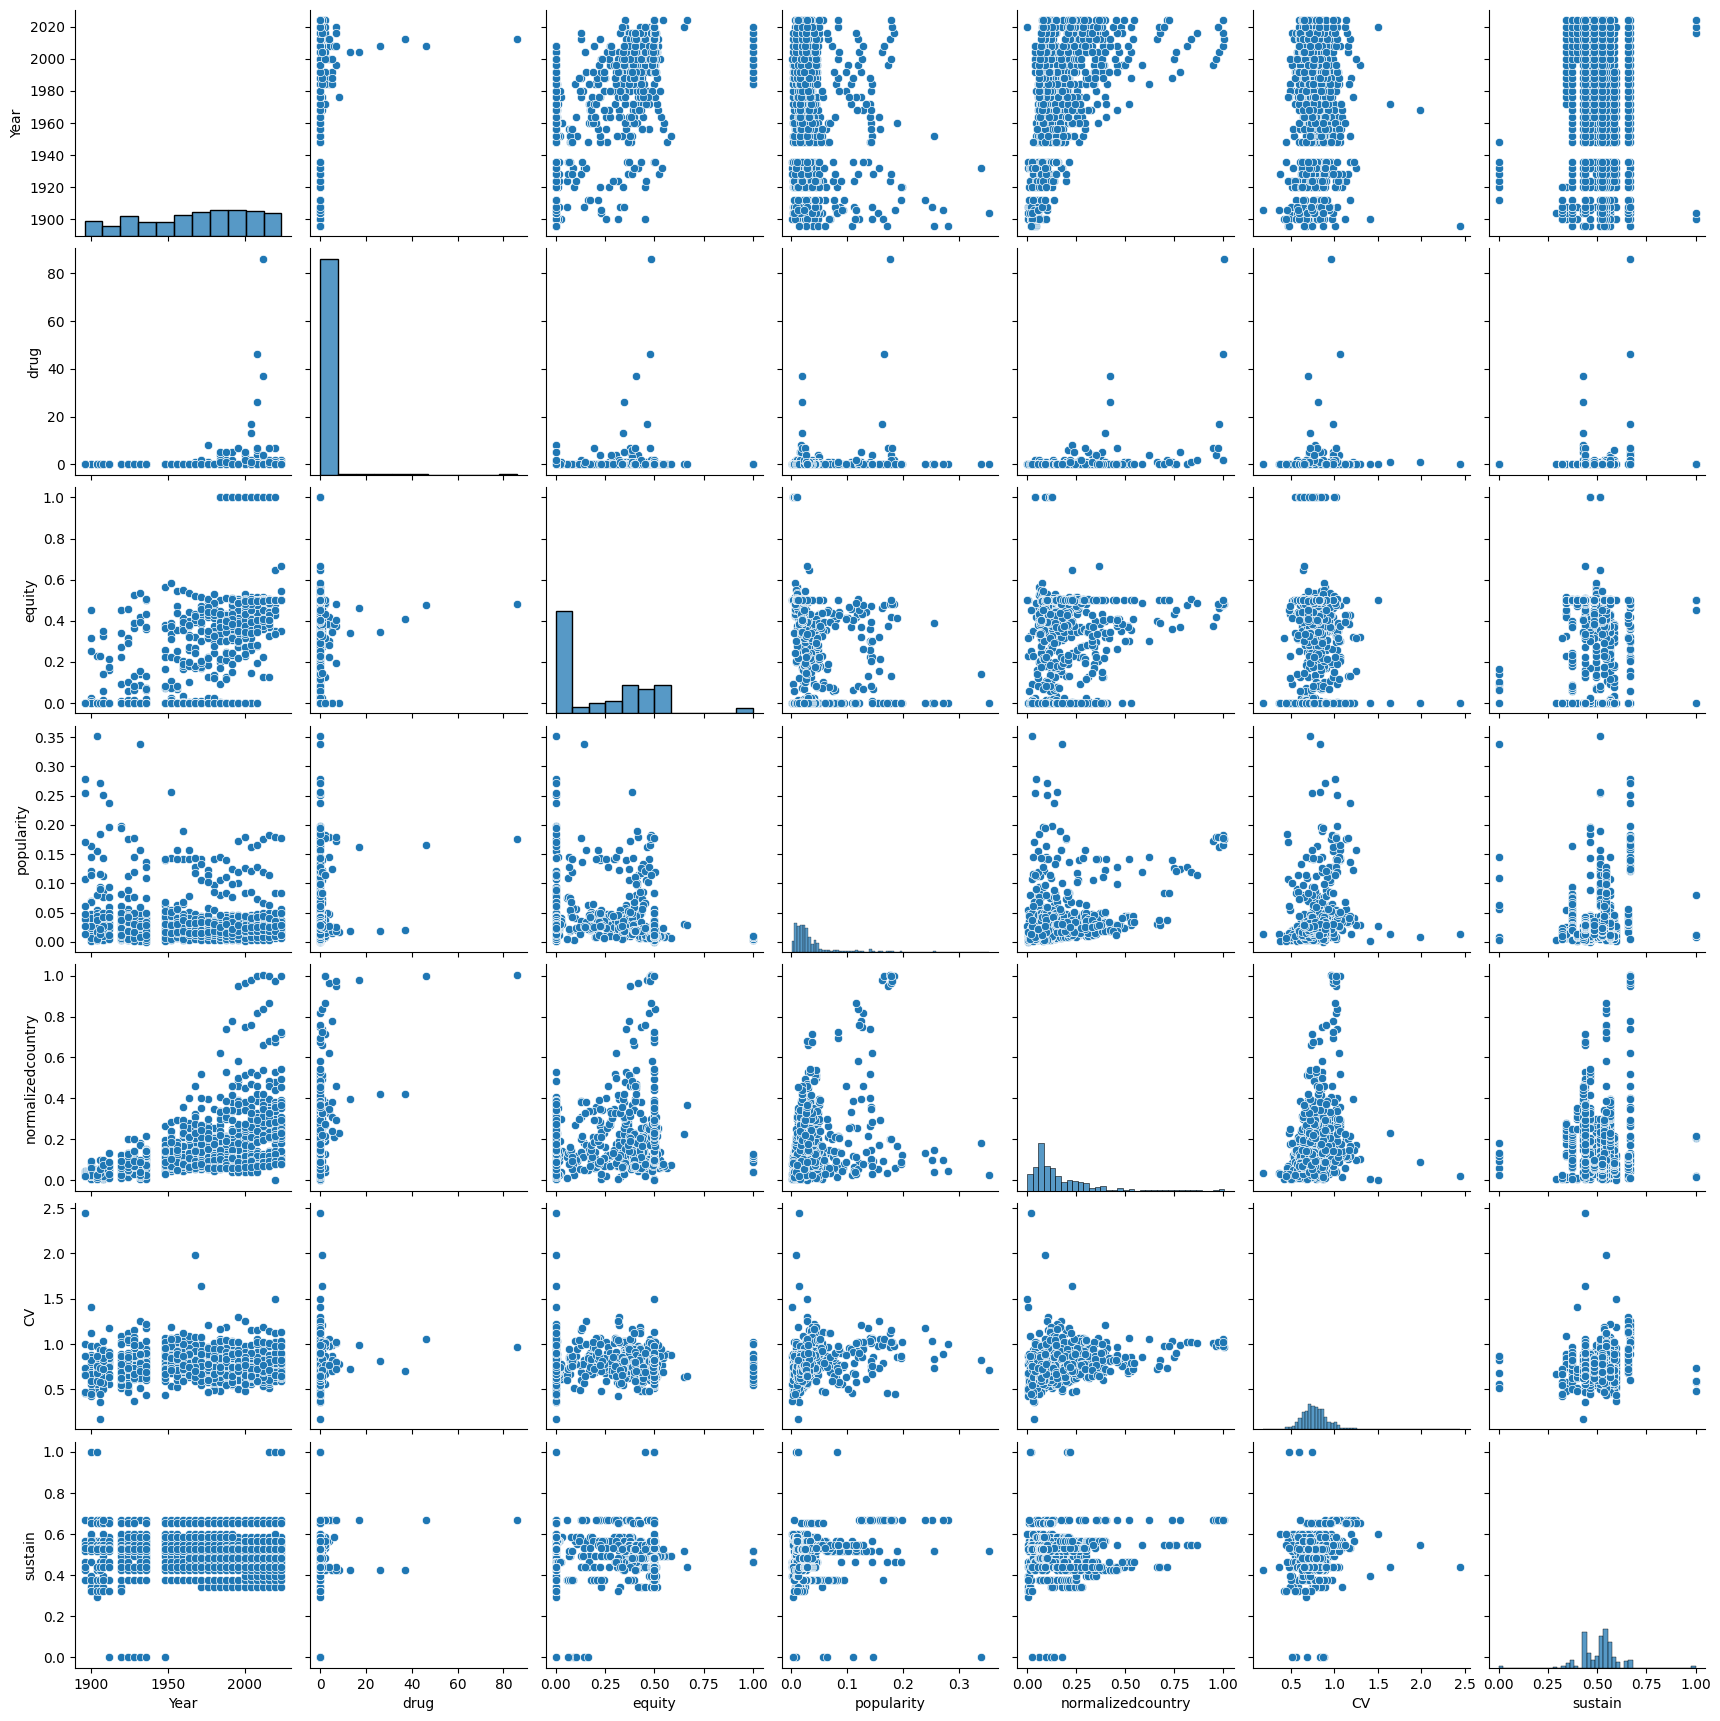

In [13]:
sns.pairplot(merged_df.select_dtypes(include=['float64', 'int64']))
plt.show()


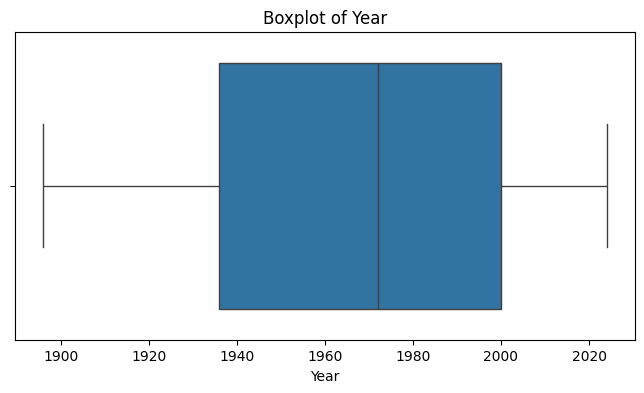

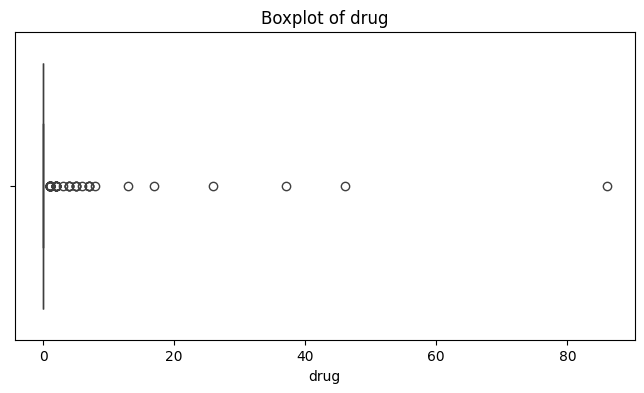

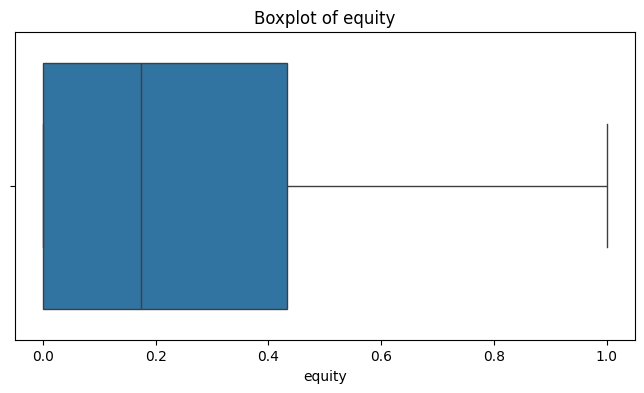

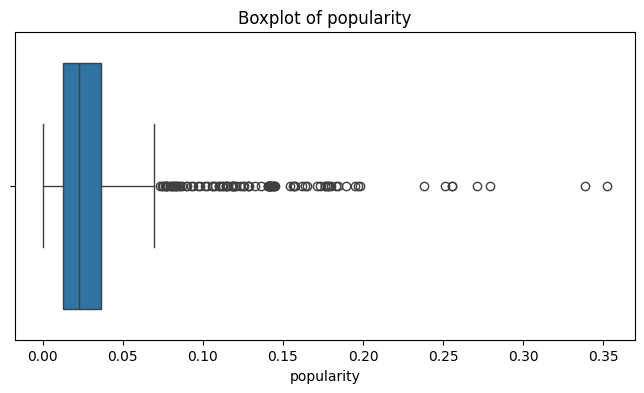

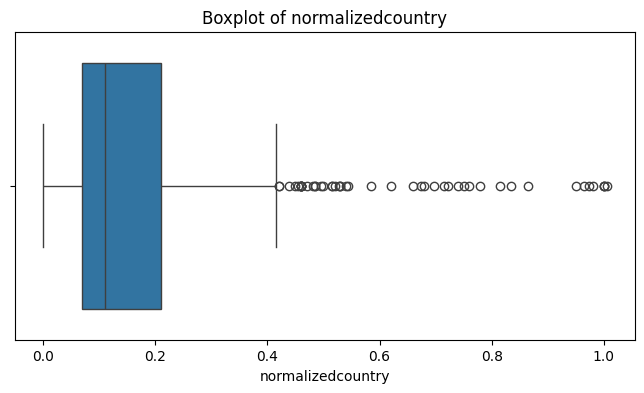

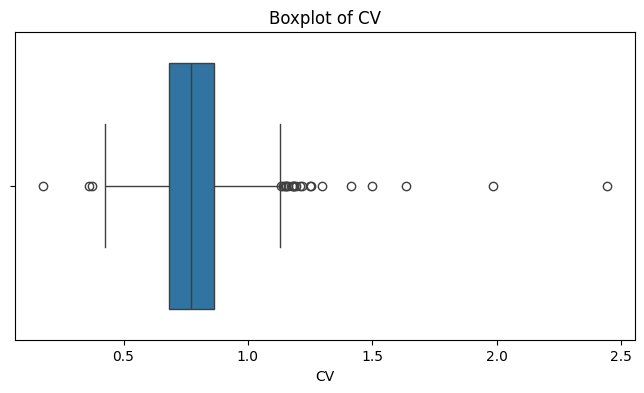

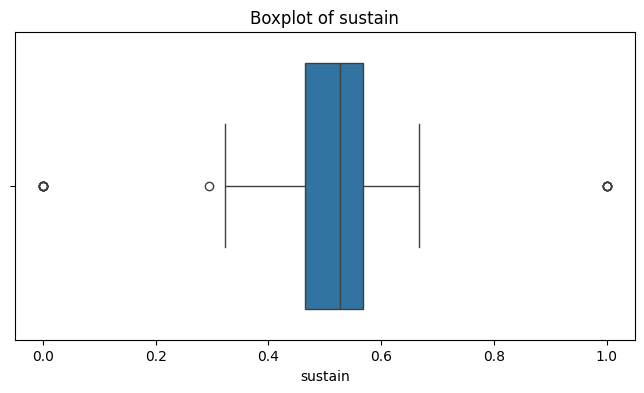

In [14]:
# Boxplot for each numeric feature
for column in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=merged_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()


Training IsolationForest...
Training OneClassSVM...


Overall Models - Comparison:
{'IsolationForest': {'Proportion of Anomalies': 0.05}, 'OneClassSVM': {'Proportion of Anomalies': 0.03409090909090909}}


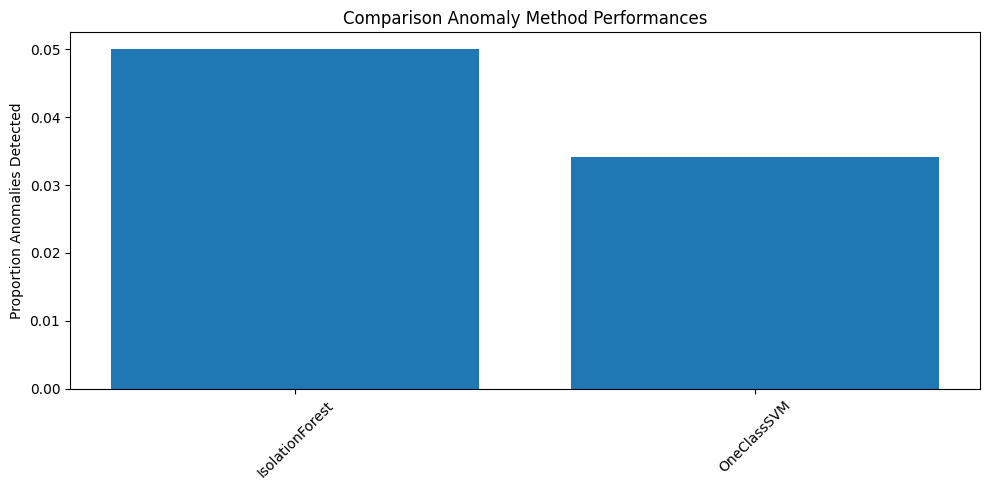

In [15]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
# Assuming merged_df is already available

# Select relevant features
features = merged_df.drop(columns=['Year'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Define models and hyperparameter grids
models = {
    "IsolationForest": IsolationForest(),
    "OneClassSVM": OneClassSVM(kernel='rbf', gamma='scale')
}

param_grids = {
    "IsolationForest": {
        'n_estimators': [50, 100, 150],
        'max_samples': [0.8, 1.0],
        'contamination': [0.05, 0.1, 0.2],
        'random_state': [42]
    },
    "OneClassSVM": {
        'nu': [0.01, 0.05, 0.1, 0.2],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Step 3: Train and optimize models using GridSearchCV
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='f1_macro',  # Change if necessary
        cv=3,
        n_jobs=-1
    )
    grid_search.fit(scaled_features, [1]*len(scaled_features))  # Only normal data as label
    results[model_name] = {
        "best_params": grid_search.best_params_,
        "best_estimator": grid_search.best_estimator_,
        "cv_results": grid_search.cv_results_
    }

# Step 4: Evaluate models on training data
evaluation_scores = {}
# Updated evaluation using internal scores or anomaly detection comparison
evaluation_scores = {}

for model_name, model_info in results.items():
    model = model_info['best_estimator']
    
    # Predict anomalies (-1) and normal points (1)
    predictions = model.predict(scaled_features)
    
    # Score the detected anomalies based on internal performance
    evaluation_scores[model_name] = {
        "Proportion of Anomalies": sum(predictions == -1) / len(predictions)
    }

# Compare Results and Visualize
print(f"\n\nOverall Models - Comparison:")
print(evaluation_scores)

# Optional: Plot for better visualization
plt.figure(figsize=(10, 5))

# Plot the Proportion of how many are truly anomalous
plt.bar(range(len(evaluation_scores)), [score["Proportion of Anomalies"] for _, score in evaluation_scores.items()])

plt.xticks(range(len(evaluation_scores)), list(evaluation_scores.keys()), rotation=45)
plt.ylabel("Proportion Anomalies Detected")
plt.title("Comparison Anomaly Method Performances")

plt.tight_layout()
plt.show()


In [16]:
merged_df2.describe()

,Year,drug,equity,popularity,normalizedcountry,CV,label,sustain
count,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000,1624.000000
mean,1960.620690,0.227833,0.227039,0.027579,0.115634,0.776394,0.541872,0.508866
std,39.524206,2.774288,0.231672,0.046114,0.131436,0.234089,0.498397,0.120502
min,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1924.000000,0.000000,0.000000,0.006816,0.035707,0.657281,0.000000,0.464455
50%,1964.000000,0.000000,0.207207,0.016127,0.080000,0.759141,1.000000,0.516167
75%,1996.000000,0.000000,0.450462,0.028389,0.145000,0.868697,1.000000,0.567916
max,2024.000000,86.000000,1.000000,0.400000,1.005000,2.442317,1.000000,1.000000


In [17]:
merged_df2

,Year,drug,equity,popularity,normalizedcountry,CV,label,sustain
0,1896,0.0,0.316822,0.029387,0.023511,0.775016,0,0.567916
1,1900,0.0,0.318375,0.029939,0.031223,0.780618,0,0.567916
2,1904,0.0,0.319929,0.030490,0.038936,0.786221,0,0.567916
3,1906,0.0,0.320706,0.030766,0.042793,0.789022,0,0.567916
4,1908,0.0,0.321482,0.031042,0.046649,0.791823,0,0.567916
...,...,...,...,...,...,...,...,...
2010,2008,7.0,0.192420,0.025217,0.295000,0.722179,1,0.437871
2011,2012,4.0,0.224189,0.026238,0.350000,0.767672,1,0.437871
2012,2016,1.0,0.323699,0.025278,0.330000,0.709537,1,0.437871
2013,2020,0.0,0.333333,0.027252,0.356916,0.663988,1,0.437871


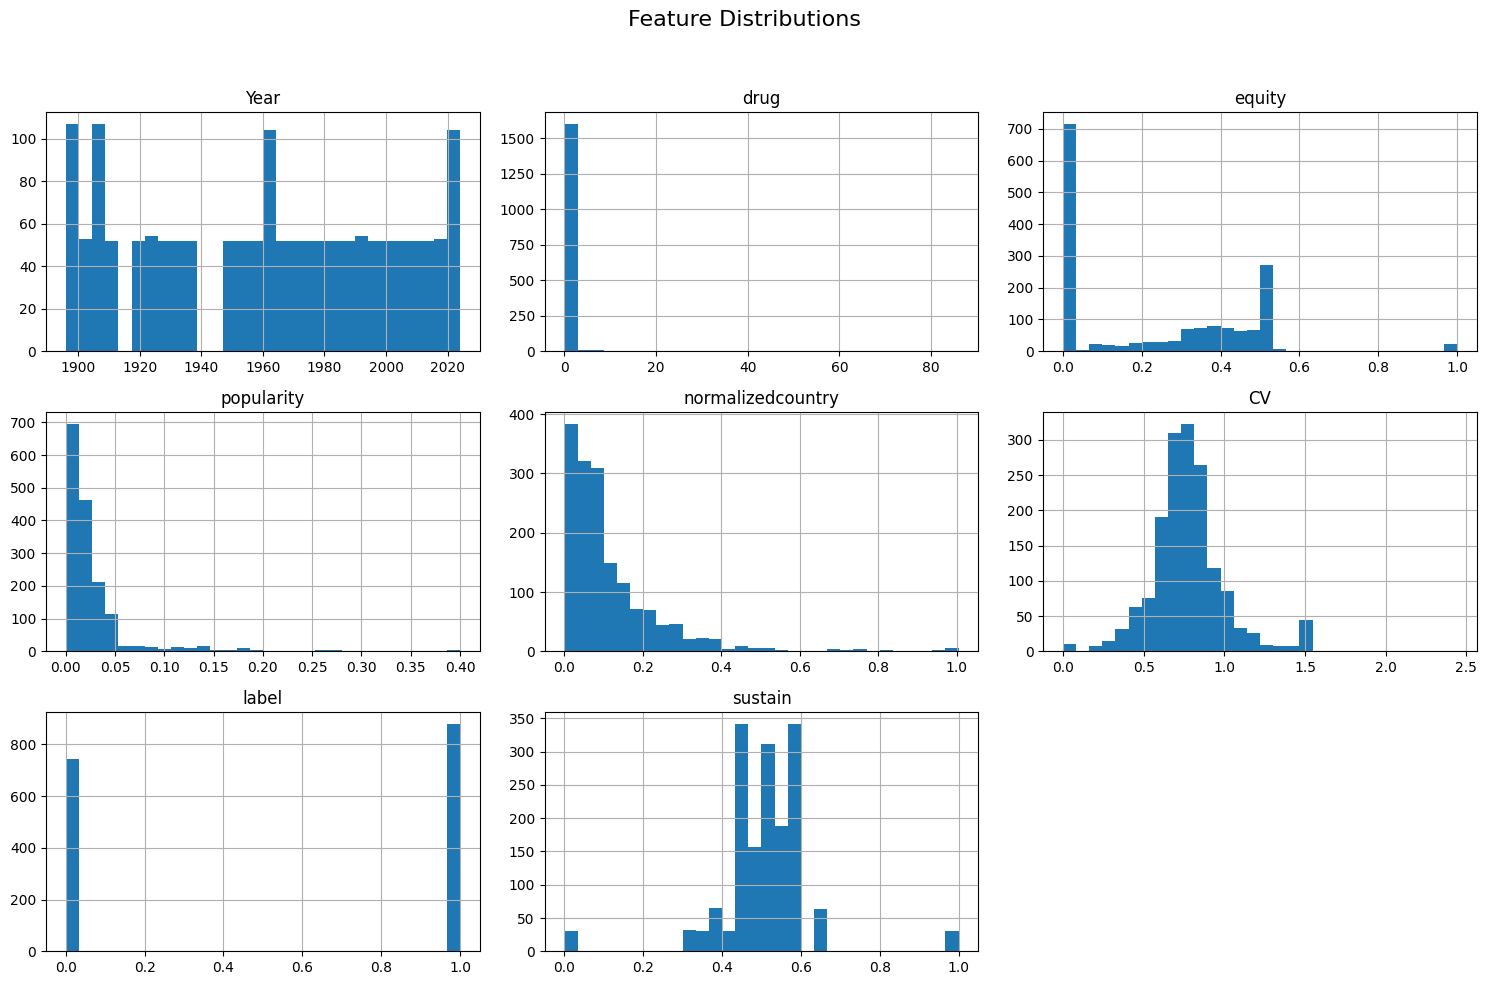

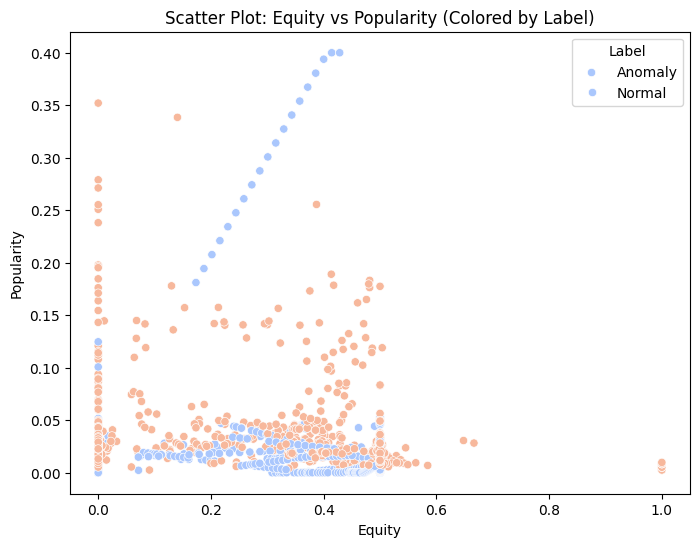

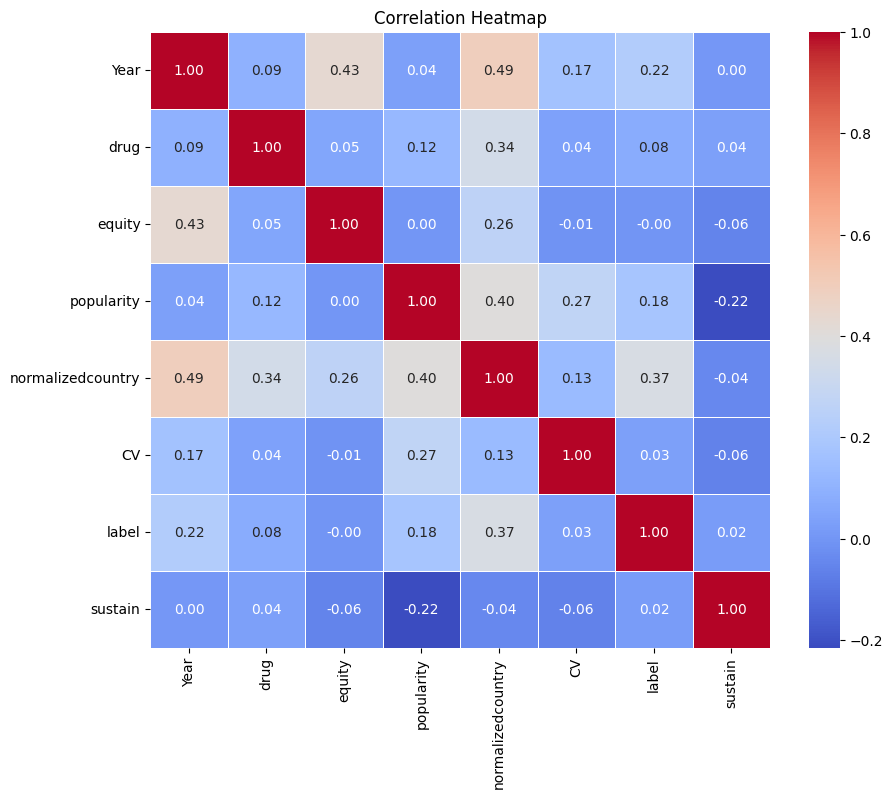

/tmp/ipykernel_22704/1188648840.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='label', palette='coolwarm')


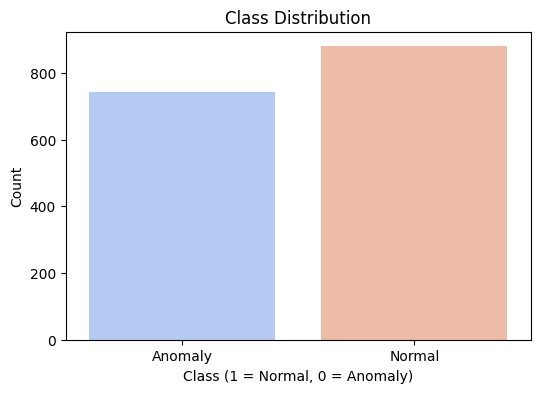

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged_df2
df2 = merged_df2.copy()

# 1. Feature distribution (Histogram)
df2.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2. Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='equity', y='popularity', hue='label', palette='coolwarm')
plt.title("Scatter Plot: Equity vs Popularity (Colored by Label)")
plt.xlabel("Equity")
plt.ylabel("Popularity")
plt.legend(title="Label", labels=["Anomaly", "Normal"])
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4. Class Distribution Bar Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='label', palette='coolwarm')
plt.title("Class Distribution")
plt.xlabel("Class (1 = Normal, 0 = Anomaly)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Anomaly", "Normal"])
plt.show()


/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-12.578905953598472 > -78.551025113657829). You may want to try with a higher value of support_fraction (current value: 0.505).
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14.020337062920751 > -79.498735060622096). You may want to try with a higher value of support_fraction (current value: 0.505).
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-14.002149380002784 > -79.497250012689136). You may want to try with a higher va

Classification Report for IsolationForest:
{'0': {'precision': 0.6333333333333333, 'recall': 0.20430107526881722, 'f1-score': 0.3089430894308943, 'support': 744.0}, '1': {'precision': 0.5722543352601156, 'recall': 0.9, 'f1-score': 0.6996466431095406, 'support': 880.0}, 'accuracy': 0.5812807881773399, 'macro avg': {'precision': 0.6027938342967245, 'recall': 0.5521505376344086, 'f1-score': 0.5042948662702175, 'support': 1624.0}, 'weighted avg': {'precision': 0.600236339303511, 'recall': 0.5812807881773399, 'f1-score': 0.5206543746754809, 'support': 1624.0}}


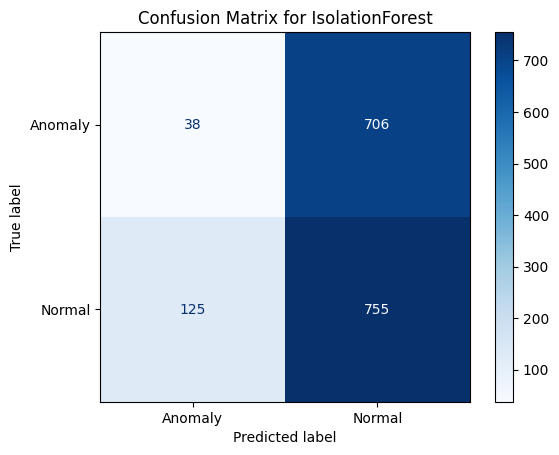

Classification Report for OneClassSVM:
{'0': {'precision': 0.8461538461538461, 'recall': 0.3548387096774194, 'f1-score': 0.5, 'support': 744.0}, '1': {'precision': 0.6341463414634146, 'recall': 0.9454545454545454, 'f1-score': 0.7591240875912408, 'support': 880.0}, 'accuracy': 0.6748768472906403, 'macro avg': {'precision': 0.7401500938086304, 'recall': 0.6501466275659824, 'f1-score': 0.6295620437956204, 'support': 1624.0}, 'weighted avg': {'precision': 0.7312729322821837, 'recall': 0.6748768472906403, 'f1-score': 0.6404120671676674, 'support': 1624.0}}


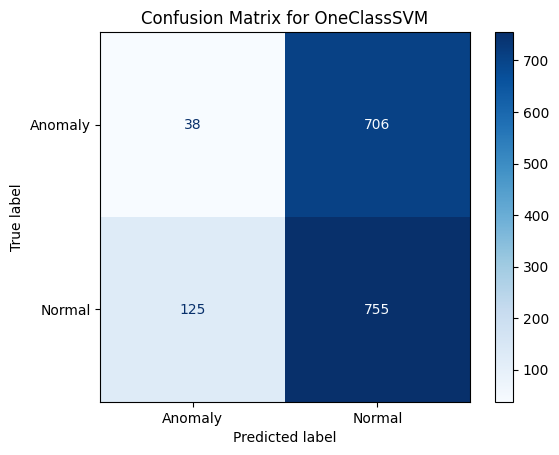

Classification Report for Autoencoder:
{'0': {'precision': 0.8957055214723927, 'recall': 0.19623655913978494, 'f1-score': 0.3219404630650496, 'support': 744.0}, '1': {'precision': 0.5906913073237509, 'recall': 0.9806818181818182, 'f1-score': 0.7372917556599744, 'support': 880.0}, 'accuracy': 0.6213054187192119, 'macro avg': {'precision': 0.7431984143980718, 'recall': 0.5884591886608016, 'f1-score': 0.529616109362512, 'support': 1624.0}, 'weighted avg': {'precision': 0.730426883263769, 'recall': 0.6213054187192119, 'f1-score': 0.547007665948999, 'support': 1624.0}}


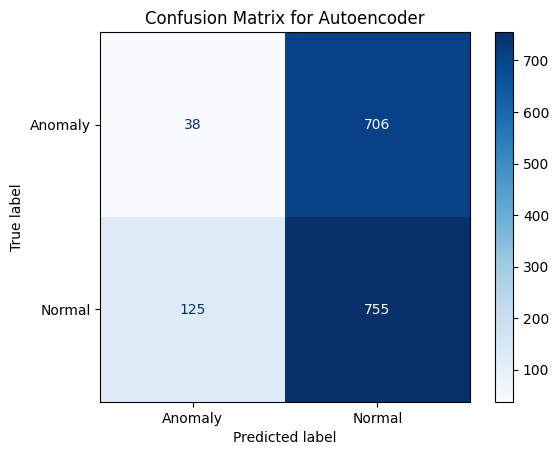

Classification Report for KMeans:
{'0': {'precision': 0.6932515337423313, 'recall': 0.15188172043010753, 'f1-score': 0.24917309812568908, 'support': 744.0}, '1': {'precision': 0.568104038329911, 'recall': 0.9431818181818182, 'f1-score': 0.7090986757795814, 'support': 880.0}, 'accuracy': 0.5806650246305419, 'macro avg': {'precision': 0.6306777860361211, 'recall': 0.5475317693059629, 'f1-score': 0.47913588695263526, 'support': 1624.0}, 'weighted avg': {'precision': 0.6254376199720543, 'recall': 0.5806650246305419, 'f1-score': 0.49839385448986717, 'support': 1624.0}}


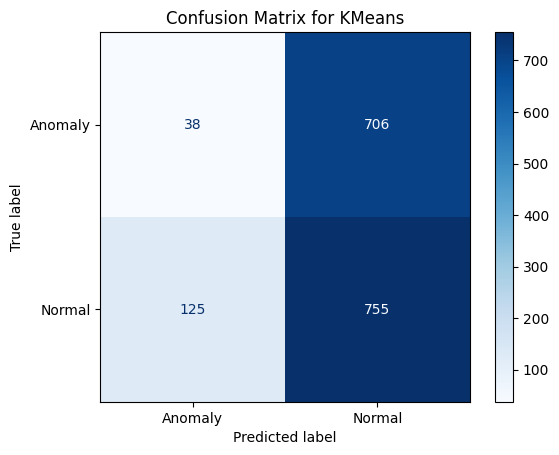

Classification Report for EllipticEnvelope:
{'0': {'precision': 0.375886524822695, 'recall': 0.07123655913978495, 'f1-score': 0.11977401129943503, 'support': 744.0}, '1': {'precision': 0.5340525960890088, 'recall': 0.9, 'f1-score': 0.6703343207786712, 'support': 880.0}, 'accuracy': 0.520320197044335, 'macro avg': {'precision': 0.4549695604558519, 'recall': 0.4856182795698925, 'f1-score': 0.3950541660390531, 'support': 1624.0}, 'weighted avg': {'precision': 0.46159227772562367, 'recall': 0.520320197044335, 'f1-score': 0.4181071839236517, 'support': 1624.0}}


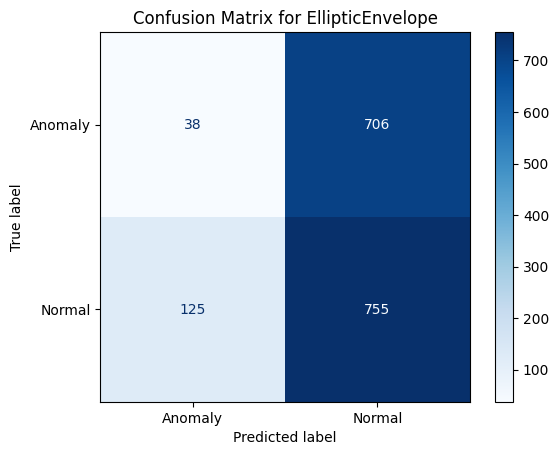

Classification Report for PCA:
{'0': {'precision': 0.7116564417177914, 'recall': 0.15591397849462366, 'f1-score': 0.2557883131201764, 'support': 744.0}, '1': {'precision': 0.5701574264202601, 'recall': 0.946590909090909, 'f1-score': 0.7116616830414353, 'support': 880.0}, 'accuracy': 0.5843596059113301, 'macro avg': {'precision': 0.6409069340690258, 'recall': 0.5512524437927664, 'f1-score': 0.4837249980808058, 'support': 1624.0}, 'weighted avg': {'precision': 0.6349820984531193, 'recall': 0.5843596059113301, 'f1-score': 0.5028132918952428, 'support': 1624.0}}


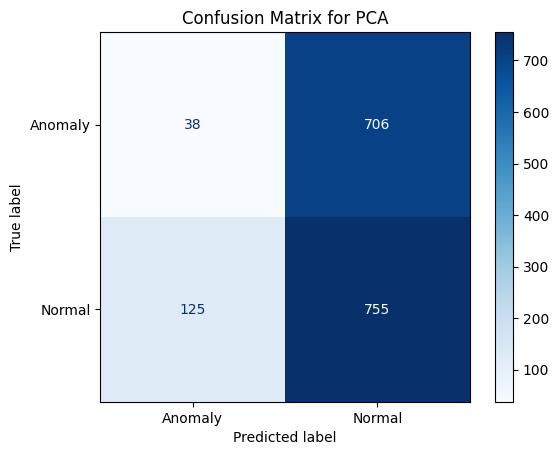

Classification Report for GMM:
{'0': {'precision': 0.6625766871165644, 'recall': 0.14516129032258066, 'f1-score': 0.23814773980154355, 'support': 744.0}, '1': {'precision': 0.5646817248459959, 'recall': 0.9375, 'f1-score': 0.7048269970098249, 'support': 880.0}, 'accuracy': 0.5745073891625616, 'macro avg': {'precision': 0.6136292059812801, 'recall': 0.5413306451612904, 'f1-score': 0.4714873684056842, 'support': 1624.0}, 'weighted avg': {'precision': 0.609530155836946, 'recall': 0.5745073891625616, 'f1-score': 0.49102812548090785, 'support': 1624.0}}


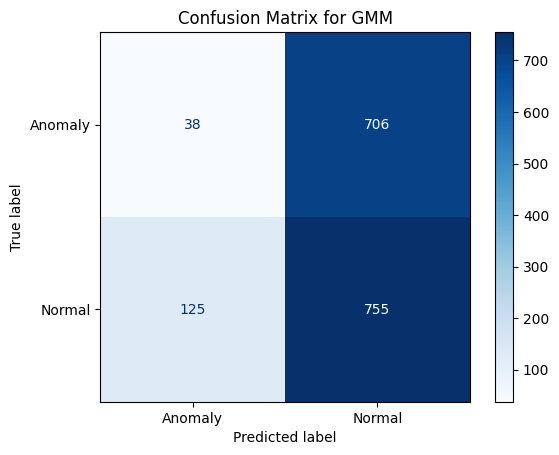

Classification Report for LocalOutlierFactor:
{'0': {'precision': 0.2331288343558282, 'recall': 0.051075268817204304, 'f1-score': 0.08379272326350606, 'support': 744.0}, '1': {'precision': 0.5167693360711841, 'recall': 0.8579545454545454, 'f1-score': 0.6450234942332337, 'support': 880.0}, 'accuracy': 0.4883004926108374, 'macro avg': {'precision': 0.3749490852135062, 'recall': 0.45451490713587483, 'f1-score': 0.3644081087483699, 'support': 1624.0}, 'weighted avg': {'precision': 0.38682565794543, 'recall': 0.4883004926108374, 'f1-score': 0.3879079193554767, 'support': 1624.0}}


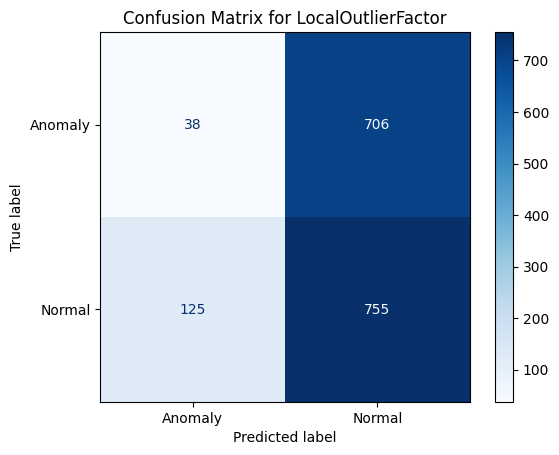

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load and prepare data
df2 = merged_df2.copy()
normal_data = df2[df2['label'] == 1].drop(columns=['label'])
all_data = df2.drop(columns=['label'])

scaler = StandardScaler()
scaled_normal_data = scaler.fit_transform(normal_data)
scaled_all_data = scaler.transform(all_data)

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Results dictionary
results = {}

# 1. Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(scaled_normal_data)
preds_if = iso_forest.predict(scaled_all_data)
preds_if = [0 if p == -1 else 1 for p in preds_if]

results['IsolationForest'] = classification_report(df2['label'], preds_if, output_dict=True)

# 2. One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
oc_svm.fit(scaled_normal_data)
preds_svm = oc_svm.predict(scaled_all_data)
preds_svm = [0 if p == -1 else 1 for p in preds_svm]

results['OneClassSVM'] = classification_report(df2['label'], preds_svm, output_dict=True)

# 3. Autoencoder (PyTorch)
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Prepare DataLoader
train_data = torch.tensor(scaled_normal_data, dtype=torch.float32).to(device)
train_loader = DataLoader(TensorDataset(train_data), batch_size=32, shuffle=True)

# Define model, loss, and optimizer
autoencoder = Autoencoder(input_dim=scaled_normal_data.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
for epoch in range(50):
    for batch in train_loader:
        batch = batch[0]
        optimizer.zero_grad()
        reconstructed = autoencoder(batch)
        loss = criterion(reconstructed, batch)
        loss.backward()
        optimizer.step()

# Evaluate the autoencoder
all_data_tensor = torch.tensor(scaled_all_data, dtype=torch.float32).to(device)
reconstructions = autoencoder(all_data_tensor).cpu().detach().numpy()
mse = np.mean(np.power(scaled_all_data - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 90)
preds_ae = [1 if e <= threshold else 0 for e in mse]

results['Autoencoder'] = classification_report(df2['label'], preds_ae, output_dict=True)

# 4. KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_normal_data)
distances = kmeans.transform(scaled_all_data).min(axis=1)
threshold = np.percentile(distances, 90)
preds_kmeans = [1 if d <= threshold else 0 for d in distances]

results['KMeans'] = classification_report(df2['label'], preds_kmeans, output_dict=True)

# 5. Elliptic Envelope
ell_env = EllipticEnvelope(contamination=0.1)
ell_env.fit(scaled_normal_data)
preds_ell = ell_env.predict(scaled_all_data)
preds_ell = [0 if p == -1 else 1 for p in preds_ell]

results['EllipticEnvelope'] = classification_report(df2['label'], preds_ell, output_dict=True)

# 6. PCA
pca = PCA(n_components=scaled_normal_data.shape[1])
pca.fit(scaled_normal_data)
proj = pca.inverse_transform(pca.transform(scaled_all_data))
mse_pca = np.mean(np.power(scaled_all_data - proj, 2), axis=1)
threshold_pca = np.percentile(mse_pca, 90)
preds_pca = [1 if mse <= threshold_pca else 0 for mse in mse_pca]

results['PCA'] = classification_report(df2['label'], preds_pca, output_dict=True)

# 7. Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_normal_data)
log_probs = gmm.score_samples(scaled_all_data)
threshold_gmm = np.percentile(log_probs, 10)
preds_gmm = [1 if lp >= threshold_gmm else 0 for lp in log_probs]

results['GMM'] = classification_report(df2['label'], preds_gmm, output_dict=True)

# 8. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
preds_lof = lof.fit_predict(scaled_all_data)
preds_lof = [0 if p == -1 else 1 for p in preds_lof]

results['LocalOutlierFactor'] = classification_report(df2['label'], preds_lof, output_dict=True)

# Plot confusion matrices for each model
for model_name, metrics in results.items():
    print(f"Classification Report for {model_name}:")
    print(metrics)
    
    cm = confusion_matrix(df2['label'], [1 if p > 0 else 0 for p in preds_lof])
    disp = ConfusionMatrixDisplay(cm, display_labels=["Anomaly", "Normal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


Best Params for IsolationForest: {'contamination': 0.1, 'max_samples': 1.0, 'n_estimators': 100, 'random_state': 42}
Classification Report for IsolationForest:

              precision    recall  f1-score   support

           0       0.67      0.24      0.35       744
           1       0.58      0.90      0.71       880

    accuracy                           0.60      1624
   macro avg       0.62      0.57      0.53      1624
weighted avg       0.62      0.60      0.54      1624



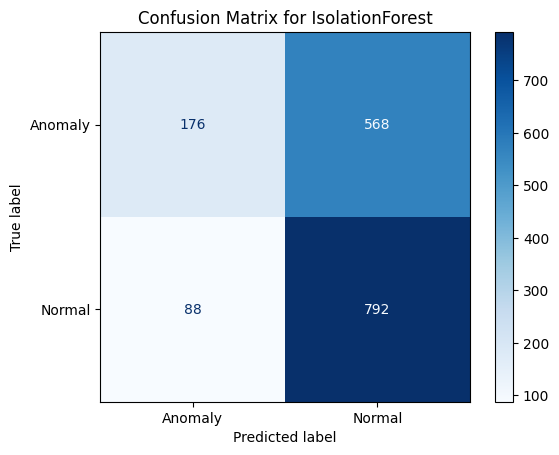

Best Params for OneClassSVM: {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.05}
Classification Report for OneClassSVM:

              precision    recall  f1-score   support

           0       0.85      0.35      0.50       744
           1       0.63      0.95      0.76       880

    accuracy                           0.67      1624
   macro avg       0.74      0.65      0.63      1624
weighted avg       0.73      0.67      0.64      1624



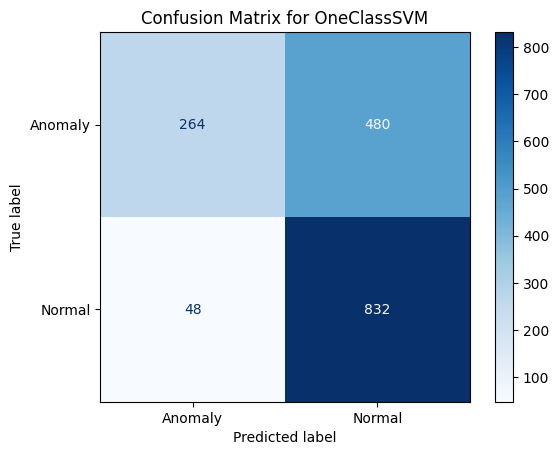

/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.003089888861570 > -78.290209449466303). You may want to try with a higher value of support_fraction (current value: 0.505).
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.078880186983994 > -78.334965888496598). You may want to try with a higher value of support_fraction (current value: 0.505).
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:187: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-13.010493980289588 > -78.256968005943151). You may want to try with a higher va

Best Params for EllipticEnvelope: {'contamination': 0.1, 'random_state': 42}
Classification Report for EllipticEnvelope:

              precision    recall  f1-score   support

           0       0.38      0.07      0.12       744
           1       0.53      0.90      0.67       880

    accuracy                           0.52      1624
   macro avg       0.45      0.49      0.40      1624
weighted avg       0.46      0.52      0.42      1624



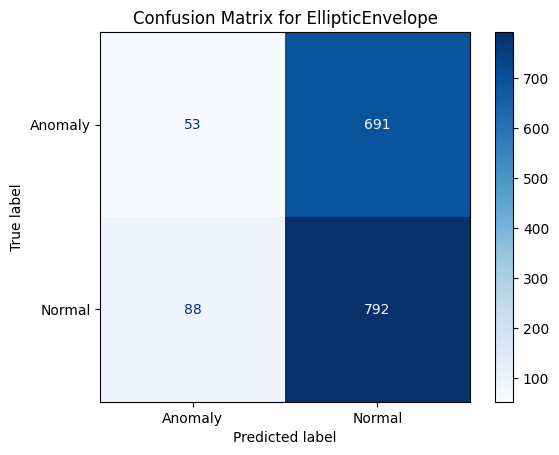

Best Params for GMM: {'covariance_type': 'full', 'n_components': 1, 'random_state': 42}
Classification Report for GMM:

              precision    recall  f1-score   support

           0       0.74      0.16      0.26       744
           1       0.57      0.95      0.72       880

    accuracy                           0.59      1624
   macro avg       0.65      0.56      0.49      1624
weighted avg       0.65      0.59      0.51      1624



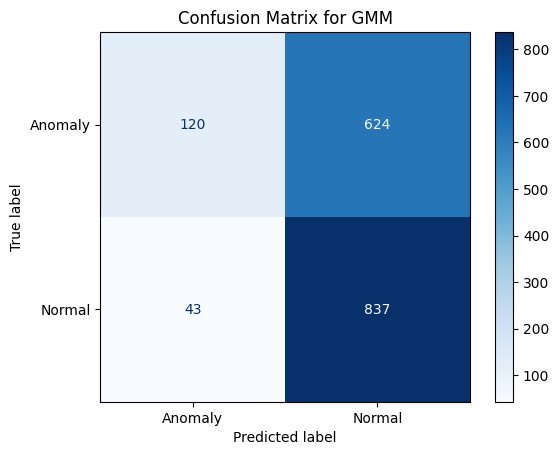

Best Params for PCA: {'n_components': 0.9}
Classification Report for PCA:

              precision    recall  f1-score   support

           0       0.90      0.20      0.32       744
           1       0.59      0.98      0.74       880

    accuracy                           0.62      1624
   macro avg       0.74      0.59      0.53      1624
weighted avg       0.73      0.62      0.55      1624



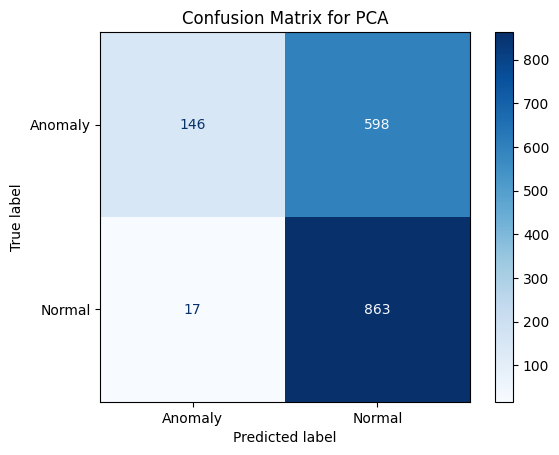

Best Params for LocalOutlierFactor: {'contamination': 0.1, 'n_neighbors': 25}
Classification Report for LocalOutlierFactor:

              precision    recall  f1-score   support

           0       0.25      0.05      0.09       744
           1       0.52      0.86      0.65       880

    accuracy                           0.49      1624
   macro avg       0.38      0.46      0.37      1624
weighted avg       0.39      0.49      0.39      1624



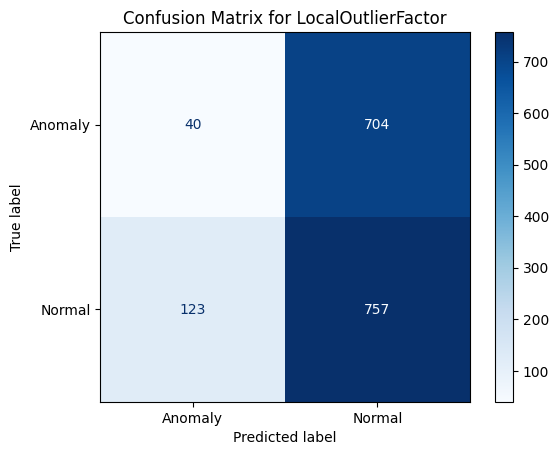

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

# Load and prepare data
df2 = merged_df2.copy()  # Ensure df2 contains your dataset with labels
normal_data = df2[df2['label'] == 1].drop(columns=['label'])
all_data = df2.drop(columns=['label'])

# Preprocessing: Standardize the data
scaler = StandardScaler()
scaled_normal_data = scaler.fit_transform(normal_data)
scaled_all_data = scaler.transform(all_data)

# Correct storage of results
results = {}

# Function for Hyperparameter Optimization and Result Storage
def evaluate_model(model, param_grid, model_name, X_train, X_test, y_true, gmm=False, pca=False, lof=False):
    best_score = -np.inf
    best_params = None
    best_preds = None
    
    # Use ParameterGrid for manual hyperparameter search
    for params in ParameterGrid(param_grid):
        if lof:
            preds = model.set_params(**params).fit_predict(X_test)
            preds = [0 if p == -1 else 1 for p in preds]
        elif gmm:
            model.set_params(**params).fit(X_train)
            scores = model.score_samples(X_test)
            threshold = np.percentile(scores, 10)
            preds = [1 if score >= threshold else 0 for score in scores]
        elif pca:
            model.set_params(**params).fit(X_train)
            reconstructions = model.inverse_transform(model.transform(X_test))
            mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
            threshold = np.percentile(mse, 90)
            preds = [1 if error <= threshold else 0 for error in mse]
        else:
            model.set_params(**params).fit(X_train, [1]*len(X_train))
            preds = model.predict(X_test)
            preds = [0 if p == -1 else 1 for p in preds]

        report = classification_report(y_true, preds, output_dict=True)
        f1_score = report['1']['f1-score']  # F1 for normal class (1)

        if f1_score > best_score:
            best_score = f1_score
            best_params = params
            best_preds = preds

    # Store best results
    results[model_name] = {
        'best_params': best_params,
        'classification_report': classification_report(y_true, best_preds, output_dict=True),
        'confusion_matrix': confusion_matrix(y_true, best_preds)
    }

    print(f"Best Params for {model_name}: {results[model_name]['best_params']}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_true, best_preds))

    # Plot confusion matrix
    cm = results[model_name]['confusion_matrix']
    disp = ConfusionMatrixDisplay(cm, display_labels=["Anomaly", "Normal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


# 1. Isolation Forest
param_grid_if = {
    'n_estimators': [100, 150],
    'max_samples': [0.8, 1.0],
    'contamination': [0.1, 0.12],
    'random_state': [42]
}
evaluate_model(IsolationForest(), param_grid_if, "IsolationForest", scaled_normal_data, scaled_all_data, df2['label'])

# 2. One-Class SVM
param_grid_ocsvm = {
    'nu': [0.02, 0.05],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.1]
}
evaluate_model(OneClassSVM(), param_grid_ocsvm, "OneClassSVM", scaled_normal_data, scaled_all_data, df2['label'])

# 3. Elliptic Envelope
param_grid_ee = {
    'contamination': [0.1, 0.15],
    'random_state': [42]
}
evaluate_model(EllipticEnvelope(), param_grid_ee, "EllipticEnvelope", scaled_normal_data, scaled_all_data, df2['label'])

# 4. Gaussian Mixture Model (GMM)
param_grid_gmm = {
    'n_components': [1, 2],
    'covariance_type': ['full', 'tied'],
    'random_state': [42]
}
evaluate_model(GaussianMixture(), param_grid_gmm, "GMM", scaled_normal_data, scaled_all_data, df2['label'], gmm=True)

# 5. PCA for Anomaly Detection
param_grid_pca = {
    'n_components': [0.9, 0.95]
}
evaluate_model(PCA(), param_grid_pca, "PCA", scaled_normal_data, scaled_all_data, df2['label'], pca=True)

# 6. Local Outlier Factor
param_grid_lof = {
    'n_neighbors': [20, 25],
    'contamination': [0.1]
}
evaluate_model(LocalOutlierFactor(), param_grid_lof, "LocalOutlierFactor", scaled_normal_data, scaled_all_data, df2['label'], lof=True)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels

# Load and prepare data
X = df2.drop(columns=['label'])
y = df2['label']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Preprocessing: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Check unique classes
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_val:", np.unique(y_val))

# Results storage
results = {}

# Function for Hyperparameter Optimization and Evaluation
def evaluate_pca(param_grid, model_name, X_train, y_train, X_val, y_val):
    best_score = -np.inf
    best_params = None
    best_preds = None

    # Manual search using ParameterGrid
    for params in ParameterGrid(param_grid):
        model = PCA(**params)
        model.fit(X_train)

        # Reconstruct validation data and calculate reconstruction error
        X_val_reconstructed = model.inverse_transform(model.transform(X_val))
        reconstruction_errors = np.mean((X_val - X_val_reconstructed) ** 2, axis=1)

        # Use a threshold for anomaly detection based on reconstruction error
        threshold = np.percentile(reconstruction_errors, 90)  # Top 10% most error
        preds = np.where(reconstruction_errors > threshold, 0, 1)  # Anomaly (0), Normal (1)

        # Calculate performance metrics
        report = classification_report(y_val, preds, output_dict=True)
        f1_score = report['1']['f1-score']

        if f1_score > best_score:
            best_score = f1_score
            best_params = params
            best_preds = preds

    # Store results
    results[model_name] = {
        'best_params': best_params,
        'classification_report': classification_report(y_val, best_preds, output_dict=True),
        'confusion_matrix': confusion_matrix(y_val, best_preds)
    }

    print(f"Best Params for {model_name}: {results[model_name]['best_params']}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_val, best_preds))

    # Confusion Matrix Plot
    cm = results[model_name]['confusion_matrix']
    disp = ConfusionMatrixDisplay(cm, display_labels=["Anomaly", "Normal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()



# Model Evaluations:

# 1. Isolation Forest
param_grid_if = {
    'n_estimators': [50, 100],
    'max_samples': [0.8, 1.0],
    'contamination': [0.1, 0.2],
    'random_state': [42]
}
evaluate_model(IsolationForest(), param_grid_if, "IsolationForest", X_train_scaled, y_train, X_val_scaled, y_val)

# 2. One-Class SVM
param_grid_ocsvm = {
    'nu': [0.05, 0.1],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
evaluate_model(OneClassSVM(), param_grid_ocsvm, "OneClassSVM", X_train_scaled, y_train, X_val_scaled, y_val)

# 3. Elliptic Envelope
param_grid_ee = {
    'contamination': [0.1, 0.15],
    'random_state': [42]
}
evaluate_model(EllipticEnvelope(), param_grid_ee, "EllipticEnvelope", X_train_scaled, y_train, X_val_scaled, y_val)

# 4. Gaussian Mixture Model (GMM)
param_grid_gmm = {
    'n_components': [1, 2],
    'covariance_type': ['full', 'tied'],
    'random_state': [42]
}
evaluate_model(GaussianMixture(), param_grid_gmm, "GMM", X_train_scaled, y_train, X_val_scaled, y_val)

# 5. PCA for Anomaly Detection
param_grid_pca = {
    'n_components': [0.9, 0.95]  # Fraction of variance to retain
}

evaluate_pca(param_grid_pca, "PCA", X_train_scaled, y_train, X_val_scaled, y_val)


# 6. Local Outlier Factor
param_grid_lof = {
    'n_neighbors': [20, 30],
    'contamination': [0.1]
}
evaluate_model(LocalOutlierFactor(novelty=True), param_grid_lof, "LocalOutlierFactor", X_train_scaled, y_train, X_val_scaled, y_val, lof=True)


Unique classes in y_train: [0 1]
Unique classes in y_val: [0 1]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Best Params for RandomForest: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       149
           1       0.89      0.93      0.91       176

    accuracy                           0.90       325
   macro avg       0.90      0.90      0.90       325
weighted avg       0.90      0.90      0.90       325



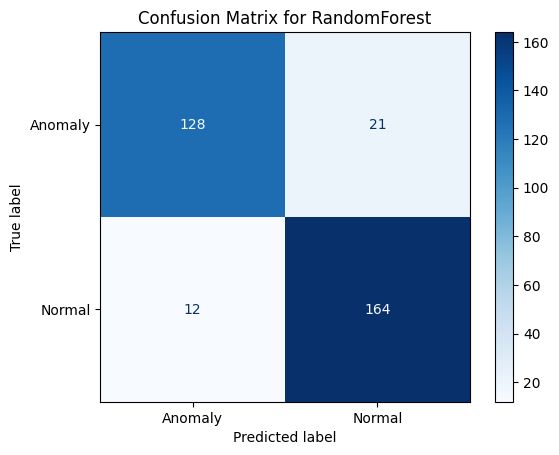

Best Params for LogisticRegression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       149
           1       0.73      0.70      0.71       176

    accuracy                           0.70       325
   macro avg       0.69      0.70      0.69       325
weighted avg       0.70      0.70      0.70       325



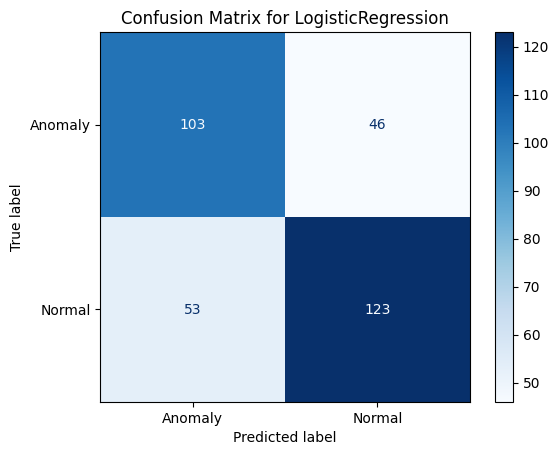

Best Params for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       149
           1       0.86      0.86      0.86       176

    accuracy                           0.85       325
   macro avg       0.85      0.85      0.85       325
weighted avg       0.85      0.85      0.85       325



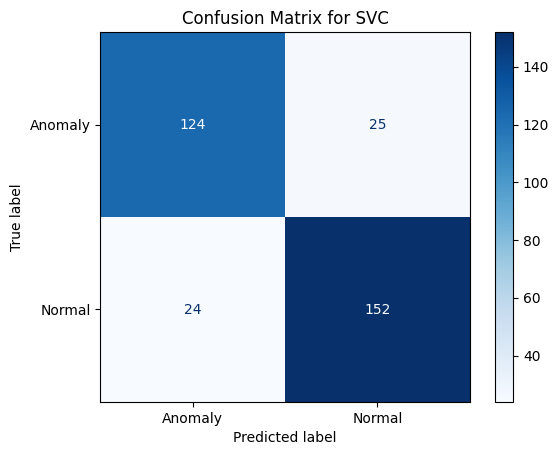

Best Params for KNN: {'n_neighbors': 10, 'weights': 'distance'}
Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       149
           1       0.91      0.86      0.88       176

    accuracy                           0.88       325
   macro avg       0.88      0.88      0.88       325
weighted avg       0.88      0.88      0.88       325



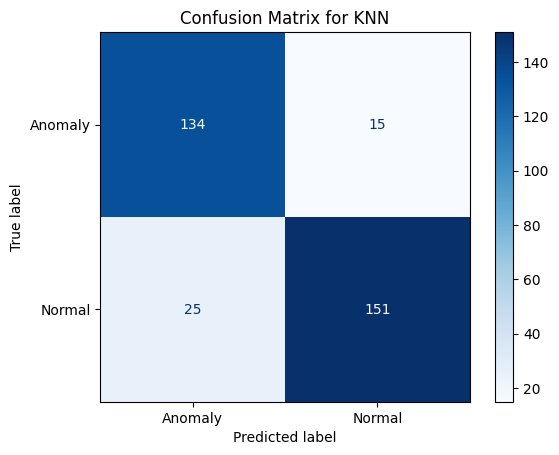

Best Params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
Classification Report for GradientBoosting:

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       149
           1       0.88      0.92      0.90       176

    accuracy                           0.89       325
   macro avg       0.89      0.88      0.88       325
weighted avg       0.89      0.89      0.89       325



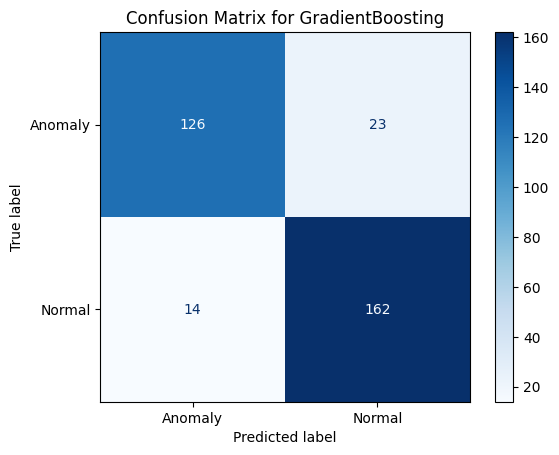

Best Params for BaggingClassifier: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100, 'random_state': 42}
Classification Report for BaggingClassifier:

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       149
           1       0.88      0.95      0.91       176

    accuracy                           0.90       325
   macro avg       0.91      0.90      0.90       325
weighted avg       0.90      0.90      0.90       325



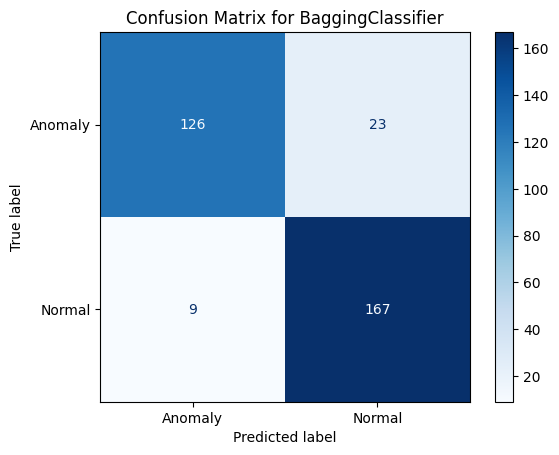

/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

Best Params for AdaBoostClassifier: {'learning_rate': 1.0, 'n_estimators': 150, 'random_state': 42}
Classification Report for AdaBoostClassifier:

              precision    recall  f1-score   support

           0       0.81      0.72      0.77       149
           1       0.79      0.86      0.82       176

    accuracy                           0.80       325
   macro avg       0.80      0.79      0.79       325
weighted avg       0.80      0.80      0.80       325



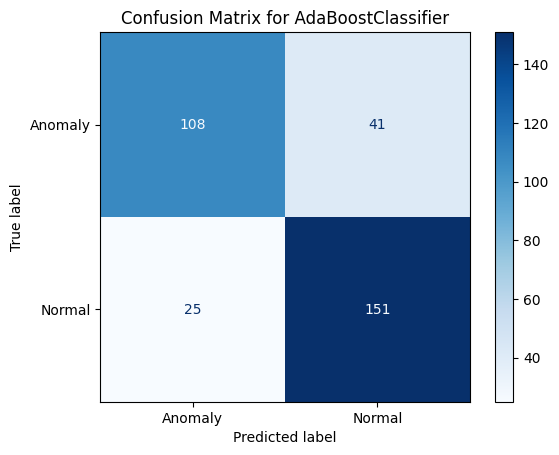

/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/media/tameszaza/My Passport/ml/.venv/lib/py

Best Params for XGBoostClassifier: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 150, 'random_state': 42}
Classification Report for XGBoostClassifier:

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       149
           1       0.90      0.93      0.91       176

    accuracy                           0.90       325
   macro avg       0.91      0.90      0.90       325
weighted avg       0.91      0.90      0.90       325



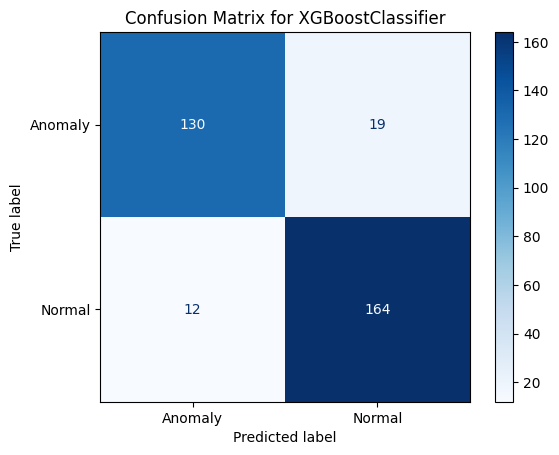

[LightGBM] [Info] Number of positive: 470, number of negative: 396
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 866, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542725 -> initscore=0.171318
[LightGBM] [Info] Start training from score 0.171318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 469, number of negative: 397
[LightGBM] [Info] Number of positive: 470, number of negative: 396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Light

/media/tameszaza/My Passport/ml/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Params for LGBMClassifier: {'learning_rate': 0.3, 'max_depth': -1, 'n_estimators': 100, 'random_state': 42}
Classification Report for LGBMClassifier:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       149
           1       0.92      0.94      0.93       176

    accuracy                           0.92       325
   macro avg       0.92      0.92      0.92       325
weighted avg       0.92      0.92      0.92       325



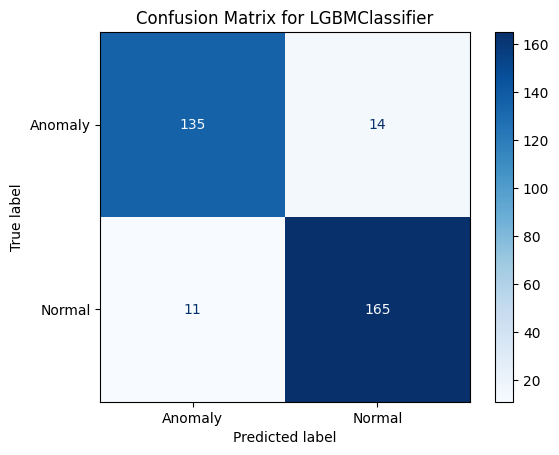

Best Params for ExtraTreesClassifier: {'max_depth': None, 'n_estimators': 100, 'random_state': 42}
Classification Report for ExtraTreesClassifier:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       149
           1       0.90      0.93      0.91       176

    accuracy                           0.90       325
   macro avg       0.91      0.90      0.90       325
weighted avg       0.90      0.90      0.90       325



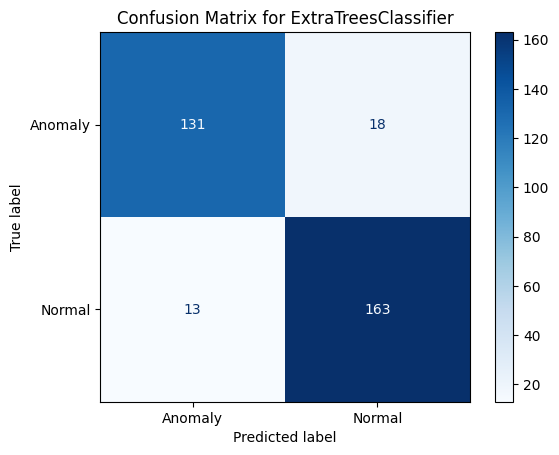

Best Params for CatBoostClassifier: {'depth': 10, 'iterations': 200, 'learning_rate': 0.3, 'random_seed': 42}
Classification Report for CatBoostClassifier:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       149
           1       0.90      0.93      0.91       176

    accuracy                           0.90       325
   macro avg       0.91      0.90      0.90       325
weighted avg       0.90      0.90      0.90       325



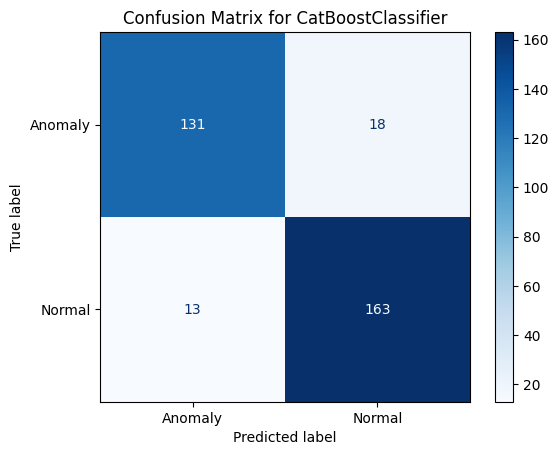

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
X = df2.drop(columns=['label'])
y = df2['label']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Results storage
results = {}

# Function for evaluating classification models
def evaluate_classification_model(model, param_grid, model_name, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    # Predict
    preds = best_model.predict(X_val)

    # Store results
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'classification_report': classification_report(y_val, preds, output_dict=True),
        'confusion_matrix': confusion_matrix(y_val, preds)
    }

    print(f"Best Params for {model_name}: {results[model_name]['best_params']}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_val, preds))

    # Confusion Matrix Plot
    cm = results[model_name]['confusion_matrix']
    disp = ConfusionMatrixDisplay(cm, display_labels=["Anomaly", "Normal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# 1. Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'random_state': [42]
}
evaluate_classification_model(RandomForestClassifier(), param_grid_rf, "RandomForest", X_train_scaled, y_train, X_val_scaled, y_val)

# 2. Logistic Regression
param_grid_lr = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}
evaluate_classification_model(LogisticRegression(), param_grid_lr, "LogisticRegression", X_train_scaled, y_train, X_val_scaled, y_val)

# 3. Support Vector Classifier (SVC)
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
evaluate_classification_model(SVC(), param_grid_svc, "SVC", X_train_scaled, y_train, X_val_scaled, y_val)

# 4. K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance']
}
evaluate_classification_model(KNeighborsClassifier(), param_grid_knn, "KNN", X_train_scaled, y_train, X_val_scaled, y_val)

# 5. Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'random_state': [42]
}
evaluate_classification_model(GradientBoostingClassifier(), param_grid_gb, "GradientBoosting", X_train_scaled, y_train, X_val_scaled, y_val)
# 6. Bagging Classifier
from sklearn.ensemble import BaggingClassifier
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'random_state': [42]
}
evaluate_classification_model(BaggingClassifier(), param_grid_bagging, "BaggingClassifier", X_train_scaled, y_train, X_val_scaled, y_val)

# 7. AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'random_state': [42]
}
evaluate_classification_model(AdaBoostClassifier(), param_grid_adaboost, "AdaBoostClassifier", X_train_scaled, y_train, X_val_scaled, y_val)

# 8. XGBoost Classifier
from xgboost import XGBClassifier
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 10],
    'random_state': [42]
}
evaluate_classification_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, "XGBoostClassifier", X_train_scaled, y_train, X_val_scaled, y_val)

# 9. LightGBM Classifier
from lightgbm import LGBMClassifier
param_grid_lgbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [-1, 10, 20],  # -1 means no limit
    'random_state': [42]
}
evaluate_classification_model(LGBMClassifier(), param_grid_lgbm, "LGBMClassifier", X_train_scaled, y_train, X_val_scaled, y_val)

# 10. ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
param_grid_extra_trees = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'random_state': [42]
}
evaluate_classification_model(ExtraTreesClassifier(), param_grid_extra_trees, "ExtraTreesClassifier", X_train_scaled, y_train, X_val_scaled, y_val)

# 11. CatBoost Classifier (if you have CatBoost installed)
from catboost import CatBoostClassifier
param_grid_catboost = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'depth': [6, 8, 10],
    'random_seed': [42]
}
evaluate_classification_model(CatBoostClassifier(verbose=0), param_grid_catboost, "CatBoostClassifier", X_train_scaled, y_train, X_val_scaled, y_val)
